# PLANT DISESASE DETECTION USING CNN

In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt 

In [3]:
dataset_path = "/PlantVillage"
BATCH_SIZE = 32
IMAGE_SIZE = 256
channels = 3
epochs = 10 #Total 50 complete dataset passes to the model 

In [4]:

image_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    labels='inferred', 
    label_mode= 'int', 
    image_size= (256, 256), 
    batch_size= BATCH_SIZE, 
    shuffle=True
)


Found 2152 files belonging to 3 classes.


In [5]:
class_names = image_dataset.class_names
print("Class Names:", class_names)

Class Names: ['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']


In [6]:
len(image_dataset)

68

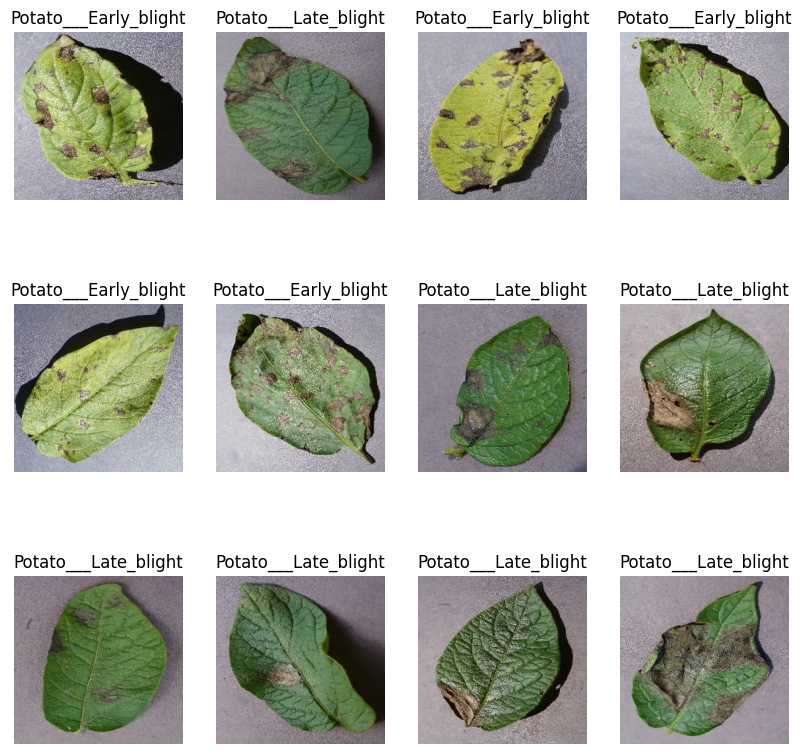

In [7]:
plt.figure(figsize=(10, 10))
for image_batch, label_batch in image_dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4, i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")
    

In [8]:
train_size = 0.8
len(image_dataset)*train_size

54.400000000000006

In [9]:
test_dataset = image_dataset.skip(54)
len(test_dataset)

14

In [10]:
val_size = 0.1
test_size = 0.1

len(image_dataset)*val_size

6.800000000000001

In [11]:
val_dataset = test_dataset.take(6)
len(val_dataset)

6

In [12]:
test_dataset = test_dataset.skip(6)
len(test_dataset)

8

In [13]:
def get_dataset_partition_tf(ds, train_split=0.8, val_split = 0.1, test_split = 0.1, shuffle=True, shuffle_size = 10000):
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed = 12)
    train_size = int(ds_size*train_split)
    val_size = int(ds_size*val_split)
    
    train_ds = ds.take(train_size)
    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds
    
train_ds, val_ds, test_ds = get_dataset_partition_tf(ds=image_dataset)

In [14]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [15]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),  # Fixed 'layers.experimental.preprocessing.Resizing'
    layers.Rescaling(1.0/255)                 # Fixed 'layers.experimental.preprocessing.Rescaling'
])

In [16]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),  # Randomly flip images horizontally and vertically
    layers.RandomRotation(0.2)                     # Randomly rotate images by 20% (0.2 * 2π radians)
])

In [17]:
input_shape = ( BATCH_SIZE ,IMAGE_SIZE, IMAGE_SIZE, channels)
n_calsses = 3
model = models.Sequential([
    resize_and_rescale, 
    data_augmentation, 
    layers.Conv2D(32, (3,3), activation="relu", input_shape = input_shape), 
    layers.MaxPooling2D((2,2)), 
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'), 
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'), 
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'), 
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'), 
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'), 
    layers.MaxPooling2D((2,2)),
    layers.Flatten(), 
    layers.Dense(64, activation='relu'), 
    layers.Dense(n_calsses, activation='softmax') 
])

model.build(input_shape=input_shape)

C:\Users\mohit\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [18]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (32, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (32, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (32, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (32, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (32, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (32, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (32, 12, 12, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (32, 6, 6, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (32, 4, 4, 64)         │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (32, 2, 2, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (32, 256)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 64)               │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 3)                │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.compile(
    optimizer='adam', 
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), 
    metrics=['accuracy']
)

In [24]:
history = model.fit(
    train_ds, 
    epochs=epochs,
    batch_size=BATCH_SIZE, 
    verbose=1, 
    validation_data=val_ds
)

Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 119s 2s/step - accuracy: 0.4191 - loss: 0.9487 - val_accuracy: 0.6562 - val_loss: 0.8137
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 98s 2s/step - accuracy: 0.6500 - loss: 0.7778 - val_accuracy: 0.7240 - val_loss: 0.5084
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 87s 2s/step - accuracy: 0.7786 - loss: 0.4921 - val_accuracy: 0.8333 - val_loss: 0.3943
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.8270 - loss: 0.4227 - val_accuracy: 0.8906 - val_loss: 0.2764
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 0.8608 - loss: 0.3297 - val_accuracy: 0.9010 - val_loss: 0.2298
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 0.9002 - loss: 0.2377 - val_accuracy: 0.9479 - val_loss: 0.1875
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.8954 - loss: 0.2743 - val_accuracy: 0.9010 - val_loss: 0.2154
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.9095 - loss: 0.2489 - val_accuracy: 0.9167 - val_loss

In [25]:
score = model.evaluate(test_ds)


8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 692ms/step - accuracy: 0.8643 - loss: 0.3181


In [26]:
score

[0.3163799047470093, 0.8671875]

In [27]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 54}

In [28]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [29]:
acc =history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Accuracy')

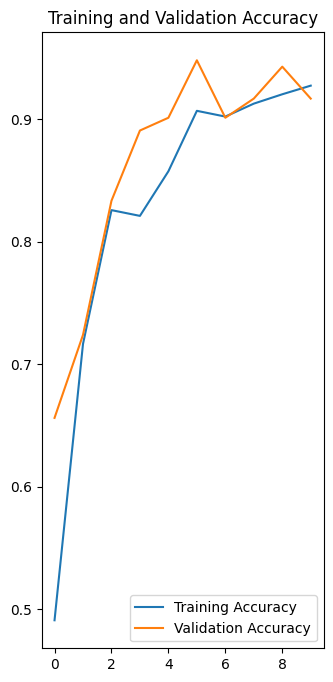

In [30]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(epochs), acc, label='Training Accuracy')
plt.plot(range(epochs), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


First image to predict: 


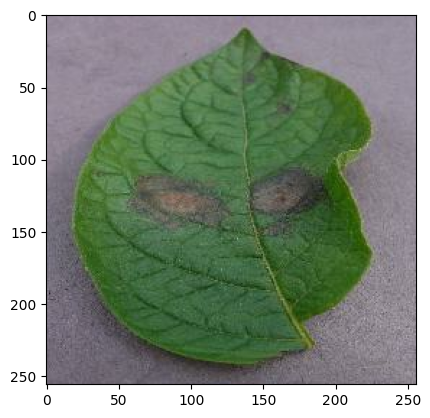

Actual label:  Potato___Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted label: Potato___Late_blight


In [32]:
import matplotlib.pyplot as plt

for image_batch, label_batch in test_ds.take(1):
    first_image = image_batch[0].numpy().astype('uint8')
    first_label = label_batch[0].numpy()  # Ensure you're accessing the label, not the image batch.

    print('First image to predict: ')
    plt.imshow(first_image)
    plt.show()  # Ensure the image is displayed.
    
    # If `label_batch` is one-hot encoded, use np.argmax to get the actual label index.
    if len(first_label.shape) > 0 and first_label.shape[0] > 1:
        label_index = np.argmax(first_label)
    else:
        label_index = first_label  # Assume it's already an index.

    print("Actual label: ", class_names[label_index])

    batch_prediction = model.predict(image_batch)
    print("Predicted label:", class_names[np.argmax(batch_prediction[0])])

    

In [41]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)  # Create a batch

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


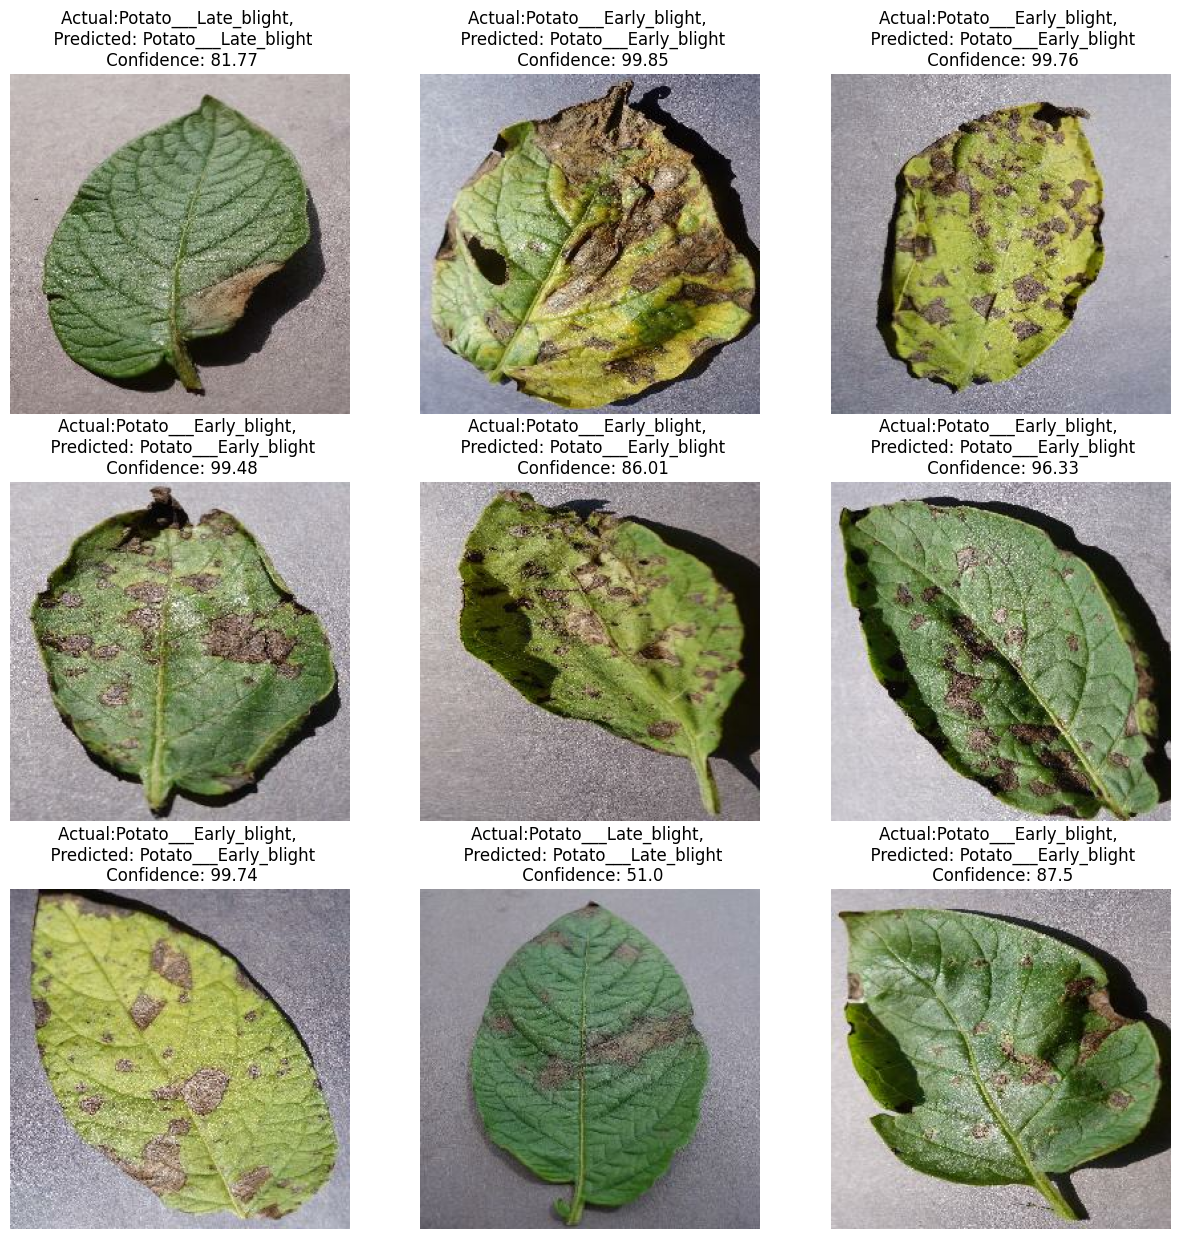

In [50]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual:{actual_class}, \n  Predicted: {predicted_class} \n Confidence: {confidence}")
        
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.axis("off")